In [1]:
# prompt: create a simple naive bayes classifier, with the training data called tran.csv, and then train split the data in 80 20, and then add the different metrics like accuracy, F1, recall and precision
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.impute import SimpleImputer

In [2]:
# Load the dataset
train_df = pd.read_csv('C:\\Users\\fabrizio natali\\Desktop\\dissertation\\train_data.csv')

In [3]:
df = pd.read_csv('C:\\Users\\fabrizio natali\\Desktop\\dissertation\\train_data.csv')
display(df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Separate features (X) and target (y)
# Assuming the last column is the target variable and the rest are features
X = df.drop('TARGET', axis=1) # Assuming 'ORGANIZATION_TYPE' is the target column name
y = df['TARGET']

In [5]:
# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().sum() / len(df) * 100

# Get the columns with more than 20% missing data
columns_to_drop = missing_percentage[missing_percentage > 20].index

# Drop the columns from the DataFrame
df_cleaned = df.drop(columns=columns_to_drop)
display(df_cleaned.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Utility function to read a CSV and report basic info
def read_data(path, show_missing_summary=False):
	df_local = pd.read_csv(path)
	print(f"Loaded file: {path}")
	print(f"Shape: {df_local.shape[0]} rows x {df_local.shape[1]} columns")
	if show_missing_summary:
		missing_pct = (df_local.isna().sum() / len(df_local) * 100).sort_values(ascending=False)
		print("\nTop 10 columns by missing %:")
		print(missing_pct.head(10))
	return df_local

# If you want to see the number of data points, call the function like this:
train_df_read = read_data('C:\\Users\\fabrizio natali\\Desktop\\dissertation\\train_data.csv')

Loaded file: C:\Users\fabrizio natali\Desktop\dissertation\train_data.csv
Shape: 307511 rows x 122 columns


In [7]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns

In [8]:
import numpy as np  # Added import to fix NameError

# Identify non-numeric columns
non_numeric_cols = df_cleaned.select_dtypes(exclude=np.number).columns
print("Non-numeric columns found:", list(non_numeric_cols))

Non-numeric columns found: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


In [9]:
# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_cols, dummy_na=False)

In [10]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [11]:
# Verify that all columns are now numeric (except potentially the target variable if it was non-numeric initially)
# Ensure df_encoded exists (it is normally created in a later cell). If not yet created, create it here.
if 'df_encoded' not in globals():
	# Use already prepared df_cleaned and non_numeric_cols from earlier cells
	df_encoded = pd.get_dummies(df_cleaned, columns=non_numeric_cols)
	print("Created df_encoded locally because it was not yet defined.")

print("Data types after encoding:")
display(df_encoded.dtypes)

Created df_encoded locally because it was not yet defined.
Data types after encoding:


SK_ID_CURR                               int64
TARGET                                   int64
CNT_CHILDREN                             int64
AMT_INCOME_TOTAL                       float64
AMT_CREDIT                             float64
                                        ...   
ORGANIZATION_TYPE_Transport: type 2       bool
ORGANIZATION_TYPE_Transport: type 3       bool
ORGANIZATION_TYPE_Transport: type 4       bool
ORGANIZATION_TYPE_University              bool
ORGANIZATION_TYPE_XNA                     bool
Length: 167, dtype: object

In [12]:
# Apply one-hot encoding to convert non-numeric columns to numeric
df_encoded = pd.get_dummies(df_cleaned, columns=non_numeric_cols)
display(df_encoded.head())

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,False,False,False,False,False,False,False,False,False,False
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,False,False,False,False,False,False,False,False,False,False
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,False,False,False,False,False,False,False,False,False,False
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,False,False,False,False,False,False,False,False,False,False
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Use the real data instead of generating sample data
# Separate features (X) and target (y) from the real dataset
X = df_encoded.drop('TARGET', axis=1)
y = df_encoded['TARGET']

print(f"Real dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Target distribution:")
print(y.value_counts())

Real dataset shape: (307511, 166)
Number of features: 166
Number of samples: 307511
Target distribution:
TARGET
0    282686
1     24825
Name: count, dtype: int64


In [14]:
# Verify that all columns are now numeric (except potentially the target variable if it was non-numeric initially)
print("Data types after encoding:")
display(df_encoded.dtypes)

Data types after encoding:


SK_ID_CURR                               int64
TARGET                                   int64
CNT_CHILDREN                             int64
AMT_INCOME_TOTAL                       float64
AMT_CREDIT                             float64
                                        ...   
ORGANIZATION_TYPE_Transport: type 2       bool
ORGANIZATION_TYPE_Transport: type 3       bool
ORGANIZATION_TYPE_Transport: type 4       bool
ORGANIZATION_TYPE_University              bool
ORGANIZATION_TYPE_XNA                     bool
Length: 167, dtype: object

In [15]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
# Create a Naive Bayes classifier (Gaussian Naive Bayes is suitable for continuous data)
model = GaussianNB()

In [17]:
# Impute missing values on the current train/test split (the earlier imputation was done
# before X was redefined from df_encoded, so we must refit on the new data).
imputer.fit(X_train)

# Transform and keep DataFrame structure (needed later for indexing / SHAP / plots)
X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

# Sanity checks to ensure no NaNs remain
if X_train.isna().any().any() or X_test.isna().any().any():
	missing_train = X_train.isna().sum().sum()
	missing_test = X_test.isna().sum().sum()
	raise ValueError(f"NaNs remain after imputation. Train missing: {missing_train}, Test missing: {missing_test}")

# Train the model
model.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [19]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix

# Hard predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Use probabilities for ranking-based metrics
y_scores = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

confusion = confusion_matrix(y_test, y_pred)

print("Test Set Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Average Precision Score:", average_precision)
print("Confusion Matrix:")
print(confusion)

Test Set Accuracy: 0.9128010015771588
Precision: 0.06359649122807018
Recall: 0.005840886203423968
F1 Score: 0.010699133001291274
ROC AUC Score: 0.6015845557552982
Average Precision Score: 0.10612174221067233
Confusion Matrix:
[[56111   427]
 [ 4936    29]]


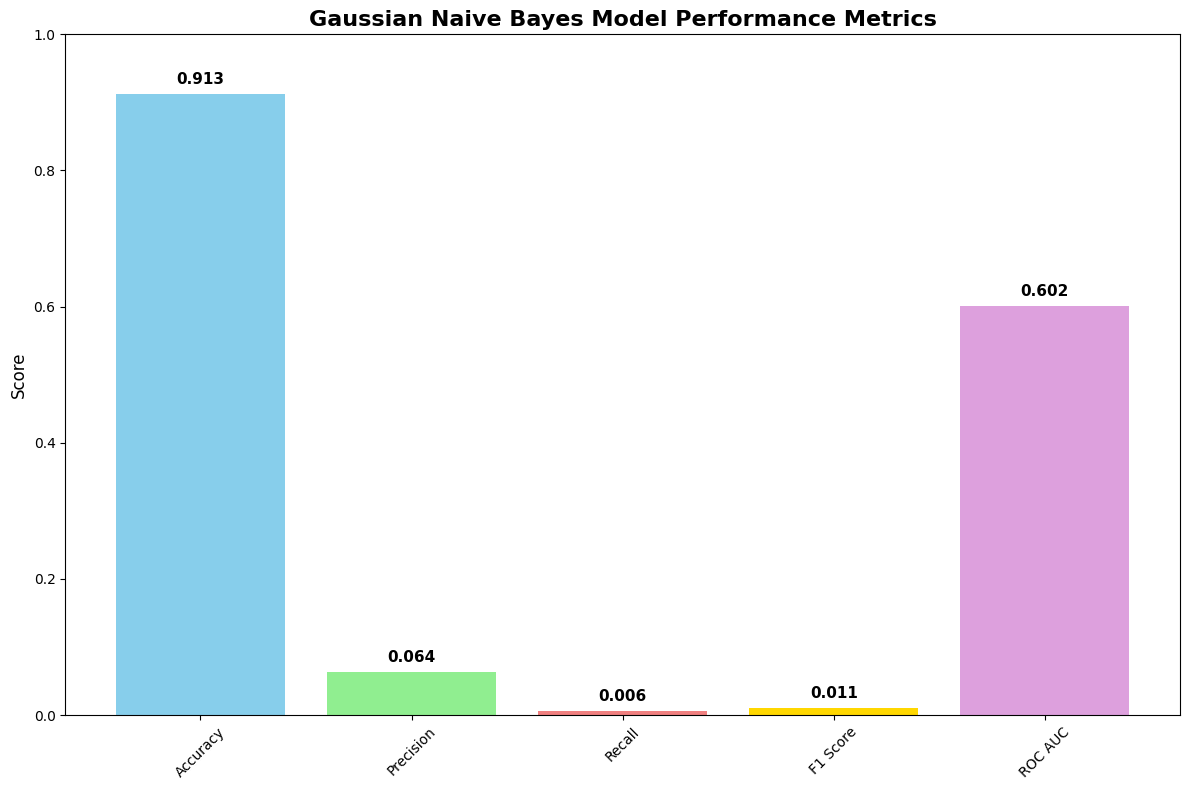


=== GAUSSIAN NAIVE BAYES MODEL SUMMARY ===
Total Features Used: 166
Number of Classes: 2
Training Set Size: 246008
Test Set Size: 61503

=== PERFORMANCE METRICS ===
Accuracy       : 0.9128
Precision      : 0.0636
Recall         : 0.0058
F1 Score       : 0.0107
ROC AUC        : 0.6016
Avg Precision   : 0.1061


In [20]:
# Model Performance Metrics Visualization
import matplotlib.pyplot as plt

metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

plt.figure(figsize=(12, 8))
metric_names = list(metrics.keys())
metric_values = list(metrics.values())

bars = plt.bar(metric_names, metric_values, color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum'])
plt.title('Gaussian Naive Bayes Model Performance Metrics', fontsize=16, fontweight='bold')
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1)

# Add value labels on bars
for bar, value in zip(bars, metric_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\n=== GAUSSIAN NAIVE BAYES MODEL SUMMARY ===")
print(f"Total Features Used: {len(X_train.columns)}")
print(f"Number of Classes: {len(model.classes_)}")
print(f"Training Set Size: {len(X_train)}")
print(f"Test Set Size: {len(X_test)}")

print(f"\n=== PERFORMANCE METRICS ===")
for metric, value in metrics.items():
    print(f"{metric:<15}: {value:.4f}")
print(f"Avg Precision   : {average_precision:.4f}")

In [21]:
# Feature importance approximation for Gaussian Naive Bayes
# Recreates the previous pattern but uses the already encoded data and a Naive Bayes model
# Instead of tree-based feature_importances_, we compute an effect size per feature.
# For binary classification: |mean1 - mean0| / sqrt(var1 + var0)
# For multi-class: take the maximum absolute pairwise standardized mean difference across classes.

from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd

# Ensure df_encoded exists
if 'df_encoded' not in globals():
    raise NameError("df_encoded not found. Make sure earlier preprocessing cells have been run.")

# Separate features and target
X_real = df_encoded.drop('TARGET', axis=1)
y_real = df_encoded['TARGET']

# Train/test split (use same random_state for reproducibility)
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(
    X_real, y_real, test_size=0.2, random_state=42, stratify=y_real if y_real.nunique() > 1 else None
)

# Fit Gaussian Naive Bayes on the real data
model_real = GaussianNB()

# GaussianNB cannot handle NaNs -> reuse existing fitted 'imputer' if available, else create a new one
if 'imputer' in globals() and hasattr(imputer, 'statistics_') and len(imputer.statistics_) == X_train_real.shape[1]:
    # Reuse previously fitted imputer
    X_train_real = pd.DataFrame(imputer.transform(X_train_real), columns=X_train_real.columns, index=X_train_real.index)
    X_test_real = pd.DataFrame(imputer.transform(X_test_real), columns=X_test_real.columns, index=X_test_real.index)
else:
    # Fallback: create and fit a new SimpleImputer (mean strategy) without re-importing (import was done in an earlier cell)
    imputer_fallback = SimpleImputer(strategy='mean')
    X_train_real = pd.DataFrame(imputer_fallback.fit_transform(X_train_real), columns=X_train_real.columns, index=X_train_real.index)
    X_test_real = pd.DataFrame(imputer_fallback.transform(X_test_real), columns=X_test_real.columns, index=X_test_real.index)

# Sanity check to ensure no NaNs remain
if X_train_real.isna().any().any() or X_test_real.isna().any().any():
    raise ValueError("NaNs remain after imputation; cannot fit GaussianNB.")

model_real.fit(X_train_real, y_train_real)

# Access learned parameters
means = model_real.theta_      # shape: (n_classes, n_features)
variances = model_real.var_    # shape: (n_classes, n_features)
classes = model_real.classes_

column_names = X_real.columns.tolist()

n_classes = means.shape[0]

if n_classes == 2:
    # Binary: standardized mean difference
    effect_size = (means[1] - means[0]) / np.sqrt(variances[1] + variances[0] + 1e-12)
    feature_importances = pd.Series(np.abs(effect_size), index=column_names)
else:
    # Multi-class: compute max absolute pairwise standardized mean difference per feature
    n_features = means.shape[1]
    importance_vals = np.zeros(n_features)
    for i in range(n_classes):
        for j in range(i + 1, n_classes):
            pair_effect = (means[j] - means[i]) / np.sqrt(variances[j] + variances[i] + 1e-12)
            importance_vals = np.maximum(importance_vals, np.abs(pair_effect))
    feature_importances = pd.Series(importance_vals, index=column_names)

# Sort and show top 10
top_features = feature_importances.sort_values(ascending=False).head(10)
print("Top 10 most important features (GaussianNB effect-size approximation):")
print(top_features)

# (Optional) You could also compute permutation importance if desired:
# from sklearn.inspection import permutation_importance
# perm = permutation_importance(model_real, X_test_real, y_test_real, n_repeats=5, random_state=42, n_jobs=-1)
# perm_importances = pd.Series(perm.importances_mean, index=column_names).sort_values(ascending=False).head(10)
# print("\nTop 10 features (Permutation Importance):")
# print(perm_importances)

Top 10 most important features (GaussianNB effect-size approximation):
DAYS_BIRTH                     0.210399
DAYS_LAST_PHONE_CHANGE         0.145198
DAYS_ID_PUBLISH                0.128502
DAYS_EMPLOYED                  0.126410
DAYS_REGISTRATION              0.112585
AMT_GOODS_PRICE                0.111101
AMT_CREDIT                     0.085152
AMT_ANNUITY                    0.035230
HOUR_APPR_PROCESS_START        0.016659
REGION_RATING_CLIENT_W_CITY    0.006273
dtype: float64


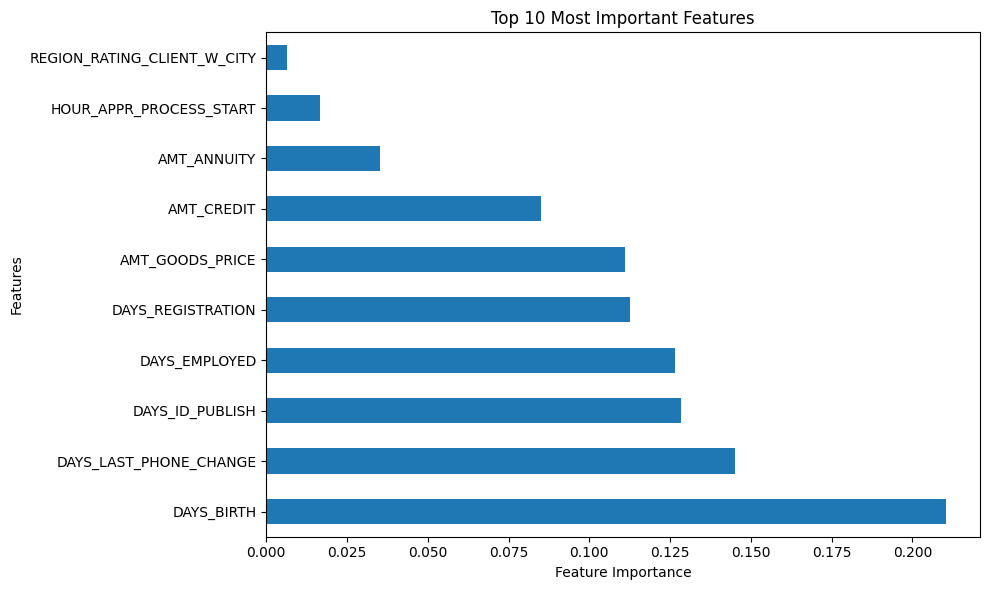

In [22]:
# Visualize feature importances
import matplotlib.pyplot as plt  # Added import to fix NameError: plt not defined

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

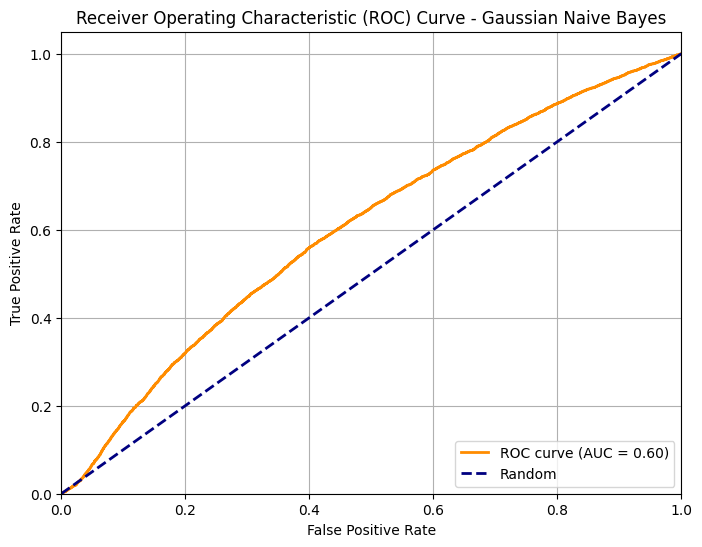

In [23]:
# ROC Curve visualization using main model
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities for ROC curve using main model
y_pred_proba_viz = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_viz)
roc_auc_viz = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_viz:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

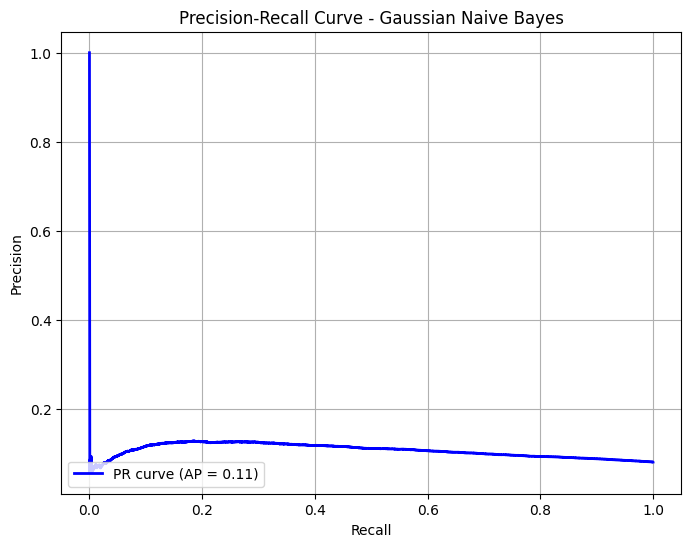

In [24]:
# Precision-Recall Curve using main model
from sklearn.metrics import precision_recall_curve, average_precision_score

precision_viz, recall_viz, _ = precision_recall_curve(y_test, y_pred_proba_viz)
avg_precision_viz = average_precision_score(y_test, y_pred_proba_viz)

plt.figure(figsize=(8, 6))
plt.plot(recall_viz, precision_viz, color='blue', lw=2, label=f'PR curve (AP = {avg_precision_viz:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Gaussian Naive Bayes')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

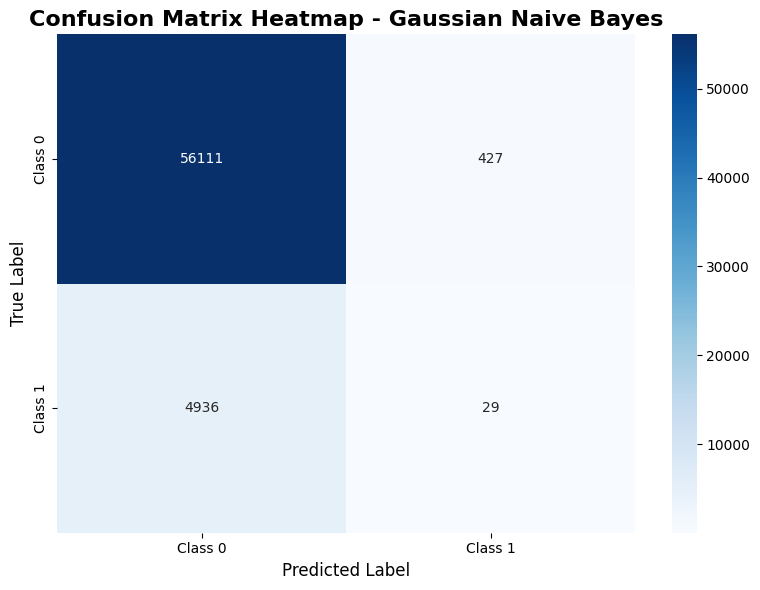


Confusion Matrix Breakdown:
True Negatives (TN): 56111
False Positives (FP): 427
False Negatives (FN): 4936
True Positives (TP): 29


In [25]:
# Confusion Matrix Heatmap
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix Heatmap - Gaussian Naive Bayes', fontsize=16, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Print confusion matrix details
tn, fp, fn, tp = confusion.ravel()
print(f"\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

Reduced features from 166 to 40 (top variance)
Background shape: (50, 40); Test explain shape: (30, 40)
Using wrapper predict_fn: injecting 126 missing features with training means.
Initializing KernelExplainer (this may take a moment)...
Computing SHAP values with nsamples=200 ...


  0%|          | 0/30 [00:00<?, ?it/s]

✓ SHAP values computed
Binary classification (ndarray return): using expected_value[1]
Base value: -3.3382243078490097
SHAP matrix shape: (30, 40, 2)
Top 10 features (mean |SHAP|):
                        feature  mean_abs_shap
4                    SK_ID_CURR       0.430953
5                   AMT_ANNUITY       0.430953
6                    DAYS_BIRTH       0.379686
7             DAYS_REGISTRATION       0.379686
12     OBS_60_CNT_SOCIAL_CIRCLE       0.303280
13   AMT_REQ_CREDIT_BUREAU_YEAR       0.303280
18         REGION_RATING_CLIENT       0.267486
19  REGION_RATING_CLIENT_W_CITY       0.267486
14              CNT_FAM_MEMBERS       0.227093
15    AMT_REQ_CREDIT_BUREAU_MON       0.227093


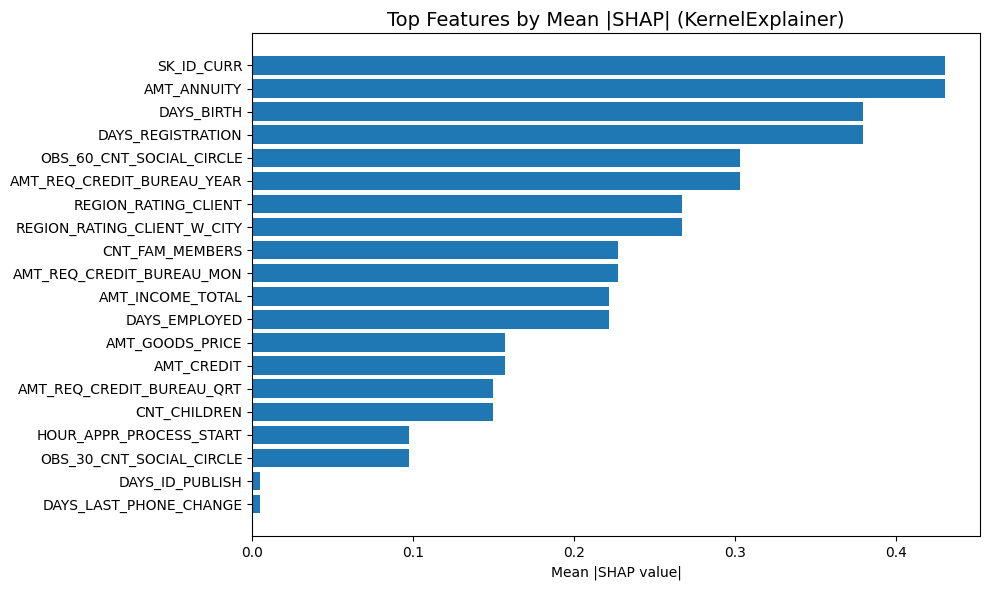

Summary plot skipped: The shape of the shap_values matrix does not match the shape of the provided data matrix.


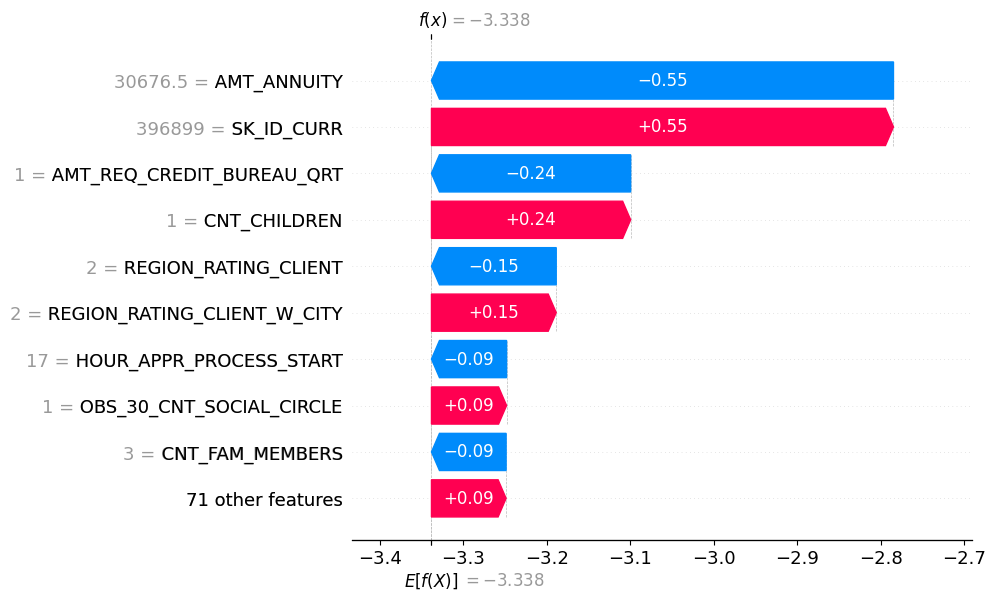

SHAP analysis complete (optimized version). Adjust MAX_BACKGROUND / MAX_TEST_SAMPLES / KERNEL_NSAMPLES for fidelity vs speed.


In [26]:
# SHAP Analysis for Model Explainability (Optimized for Performance)
# KernelExplainer can be very slow (O(M * 2^F) approximation). We aggressively sample.
# Adjust knobs below to trade off speed vs fidelity.

import shap
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# --- Configurable parameters ---
MAX_BACKGROUND = 50        # number of background rows
MAX_TEST_SAMPLES = 30      # number of test rows to explain
TOP_FEATURES = 40          # limit to top N variance features (None = all)
KERNEL_NSAMPLES = 200      # samples parameter passed to shap (approximation budget)
RANDOM_STATE = 42

# Guards
if 'model' not in globals():
    raise NameError("Model 'model' not found. Train the GaussianNB model first.")
if 'X_train' not in globals() or 'X_test' not in globals():
    raise NameError("X_train / X_test not found. Run preprocessing & split cells first.")

# Ensure DataFrames
if not isinstance(X_train, pd.DataFrame):
    X_train_df = pd.DataFrame(X_train)
else:
    X_train_df = X_train.copy()
if not isinstance(X_test, pd.DataFrame):
    X_test_df = pd.DataFrame(X_test)
else:
    X_test_df = X_test.copy()

# Optional: feature variance filtering to reduce dimensionality cost
model_feature_names = X_train_df.columns.tolist()
if TOP_FEATURES is not None and TOP_FEATURES < X_train_df.shape[1]:
    variances = X_train_df.var().sort_values(ascending=False)
    selected_features = variances.head(TOP_FEATURES).index.tolist()
    X_train_reduced = X_train_df[selected_features]
    X_test_reduced = X_test_df[selected_features]
    print(f"Reduced features from {X_train_df.shape[1]} to {len(selected_features)} (top variance)")
else:
    selected_features = model_feature_names
    X_train_reduced = X_train_df[selected_features]
    X_test_reduced = X_test_df[selected_features]

# Background sample (stratified if possible)
background = X_train_reduced.sample(n=min(MAX_BACKGROUND, len(X_train_reduced)), random_state=RANDOM_STATE)

# Test sample for explanation
test_sample = X_test_reduced.iloc[:min(MAX_TEST_SAMPLES, len(X_test_reduced))].copy()
print(f"Background shape: {background.shape}; Test explain shape: {test_sample.shape}")

# Define prediction function returning probability matrix
# If we reduced features, reconstruct the full feature set expected by the trained model.
if set(selected_features) != set(model_feature_names):
    missing_features = [c for c in model_feature_names if c not in selected_features]
    # Use training means for missing features (GaussianNB works with continuous inputs)
    filler_values = X_train_df[missing_features].mean()
    print(f"Using wrapper predict_fn: injecting {len(missing_features)} missing features with training means.")

    def predict_fn(X_partial):
        if isinstance(X_partial, np.ndarray):
            X_partial_df = pd.DataFrame(X_partial, columns=selected_features)
        else:
            X_partial_df = X_partial.copy()
        # Add missing columns with mean values
        for col in missing_features:
            X_partial_df[col] = filler_values[col]
        # Reorder to original training order
        X_full = X_partial_df[model_feature_names]
        return model.predict_proba(X_full)
else:
    predict_fn = model.predict_proba

# Create KernelExplainer
print("Initializing KernelExplainer (this may take a moment)...")
explainer = shap.KernelExplainer(predict_fn, background, link="logit")

# Compute SHAP values for the selected test samples
print(f"Computing SHAP values with nsamples={KERNEL_NSAMPLES} ...")
shap_values_list = explainer.shap_values(test_sample, nsamples=KERNEL_NSAMPLES)
print("✓ SHAP values computed")

# Handle binary vs multiclass (robust to different SHAP return types / versions)
if isinstance(shap_values_list, list):
    # Standard (multi-class) list-of-arrays output
    if len(shap_values_list) == 2:
        # Binary classification: choose positive class (index 1)
        class_index = 1
        shap_values_to_use = shap_values_list[class_index]
        # expected_value can be list-like (len 2) or scalar
        if isinstance(explainer.expected_value, (list, tuple, np.ndarray)) and len(explainer.expected_value) > class_index:
            base_value = explainer.expected_value[class_index]
        else:
            base_value = explainer.expected_value
        print(f"Binary classification (list return): using class index {class_index}")
    else:
        # Multiclass: pick dominant predicted class
        probs = predict_fn(test_sample)
        dominant_class = np.argmax(probs.mean(axis=0))
        shap_values_to_use = shap_values_list[dominant_class]
        if isinstance(explainer.expected_value, (list, tuple, np.ndarray)) and len(explainer.expected_value) > dominant_class:
            base_value = explainer.expected_value[dominant_class]
        else:
            base_value = explainer.expected_value
        print(f"Multiclass (list return): using dominant class index {dominant_class}")
elif isinstance(shap_values_list, np.ndarray):
    # Newer SHAP versions may return a single ndarray for binary classification
    # Shape expected: (n_samples, n_features)
    shap_values_to_use = shap_values_list
    ev = explainer.expected_value
    # If expected_value is iterable of length 2, pick positive class (index 1)
    if isinstance(ev, (list, tuple, np.ndarray)) and len(np.atleast_1d(ev)) == 2:
        base_value = np.atleast_1d(ev)[1]
        print("Binary classification (ndarray return): using expected_value[1]")
    else:
        # Fallback: mean if array-like, else scalar
        try:
            base_value = float(np.mean(ev))
        except Exception:
            base_value = ev
        print("Binary (ndarray return): using scalar/mean expected value")
elif hasattr(shap_values_list, 'values'):
    # Explanation object style
    shap_raw = shap_values_list
    vals = shap_raw.values
    # Possible shapes:
    # (n_samples, n_features)
    # (n_samples, n_classes, n_features)
    # (n_classes, n_samples, n_features)
    if vals.ndim == 3:
        # Try to identify axis order
        if vals.shape[1] == 2:  # (n_samples, 2, n_features)
            shap_values_to_use = vals[:, 1, :]
            base_vals = np.array(shap_raw.base_values)
            base_value = np.mean(base_vals[:, 1]) if base_vals.ndim == 2 and base_vals.shape[1] > 1 else np.mean(base_vals)
            print("Explanation object: extracted positive class from shape (samples, 2, features)")
        elif vals.shape[0] == 2:  # (2, n_samples, n_features)
            shap_values_to_use = vals[1, :, :]
            base_vals = np.array(shap_raw.base_values)
            if base_vals.ndim > 0 and len(base_vals) == 2:
                base_value = base_vals[1]
            else:
                base_value = np.mean(base_vals)
            print("Explanation object: extracted positive class from shape (2, samples, features)")
        else:
            # Fallback: choose slice with largest mean absolute magnitude
            mean_abs = [np.abs(s).mean() for s in vals]
            idx = int(np.argmax(mean_abs))
            shap_values_to_use = vals[idx] if vals.shape[0] == len(mean_abs) else vals[:, idx, :]
            base_vals = np.array(shap_raw.base_values)
            if base_vals.ndim > 0 and len(base_vals) > idx:
                base_value = base_vals[idx]
            else:
                base_value = np.mean(base_vals)
            print(f"Explanation object: heuristic class selection idx={idx}")
    elif vals.ndim == 2:
        shap_values_to_use = vals
        base_vals = np.array(shap_raw.base_values)
        base_value = np.mean(base_vals) if base_vals.ndim > 0 else base_vals
        print("Explanation object: 2D values (samples, features)")
    else:
        # Flatten any unusual shape
        shap_values_to_use = vals.reshape(vals.shape[0], -1)
        base_vals = np.array(shap_raw.base_values)
        base_value = base_vals[0] if base_vals.ndim > 0 else base_vals
        print("Explanation object: reshaped unexpected dimensionality")
else:
    # Final fallback: attempt to coerce to ndarray
    arr = np.array(shap_values_list)
    if arr.ndim == 2:
        shap_values_to_use = arr
        ev = explainer.expected_value
        if isinstance(ev, (list, tuple, np.ndarray)) and len(np.atleast_1d(ev)) == 2:
            base_value = np.atleast_1d(ev)[1]
        else:
            base_value = float(np.mean(ev)) if np.ndim(ev) > 0 else ev
        print("Fallback coercion: interpreted SHAP output as (samples, features) array")
    else:
        raise RuntimeError("Unsupported SHAP output structure after exhaustive parsing.")

print(f"Base value: {base_value}")
print(f"SHAP matrix shape: {shap_values_to_use.shape}")

# Aggregate mean absolute importance (robust flattening)
shap_matrix = np.array(shap_values_to_use)
# Ensure 2D (n_samples, n_features)
if shap_matrix.ndim == 1:
    shap_matrix = shap_matrix.reshape(1, -1)
elif shap_matrix.ndim > 2:
    # Collapse extraneous dimensions
    shap_matrix = shap_matrix.reshape(shap_matrix.shape[0], -1)

# Now compute mean absolute SHAP per feature
mean_importance = np.abs(shap_matrix).mean(axis=0).ravel()

if len(mean_importance) != len(selected_features):
    # Safety alignment: truncate or pad (should rarely happen)
    min_len = min(len(mean_importance), len(selected_features))
    mean_importance = mean_importance[:min_len]
    selected_features = selected_features[:min_len]

importance_df = (
    pd.DataFrame({'feature': selected_features, 'mean_abs_shap': mean_importance})
      .sort_values('mean_abs_shap', ascending=False)
)
print("Top 10 features (mean |SHAP|):")
print(importance_df.head(10))

# Bar plot (top 20)
import matplotlib.pyplot as plt
TOP_BAR = min(20, len(importance_df))
plt.figure(figsize=(10, 6))
plt.barh(importance_df.head(TOP_BAR)['feature'][::-1], importance_df.head(TOP_BAR)['mean_abs_shap'][::-1])
plt.title('Top Features by Mean |SHAP| (KernelExplainer)', fontsize=14)
plt.xlabel('Mean |SHAP value|')
plt.tight_layout()
plt.show()

# Summary plot (if feature count reasonable)
if len(selected_features) <= 80:
    try:
        shap.summary_plot(shap_matrix, test_sample.iloc[:shap_matrix.shape[0], :len(selected_features)],
                          feature_names=selected_features, show=True)
    except Exception as e:
        print(f"Summary plot skipped: {e}")
else:
    print("Skipping summary plot due to high feature dimensionality. Increase TOP_FEATURES to view.")

# Waterfall for first sample (optional)
try:
    first_idx = 0
    sample_values = np.ravel(shap_matrix[first_idx])
    sample_data = test_sample.iloc[first_idx, :len(selected_features)]
    shap.waterfall_plot(
        shap.Explanation(
            values=sample_values,
            base_values=base_value,
            data=sample_data.values,
            feature_names=selected_features
        )
    )
except Exception as e:
    print(f"Waterfall plot skipped: {e}")

print("SHAP analysis complete (optimized version). Adjust MAX_BACKGROUND / MAX_TEST_SAMPLES / KERNEL_NSAMPLES for fidelity vs speed.")

SHAP values shape: (30, 2)
Data frame shape:  (30, 2)


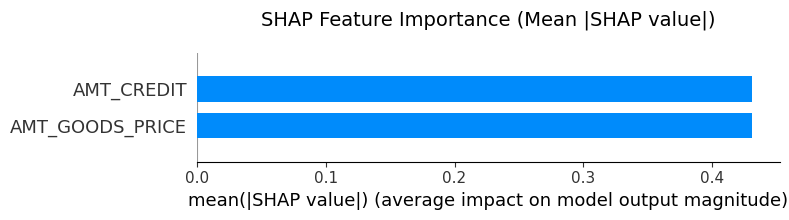

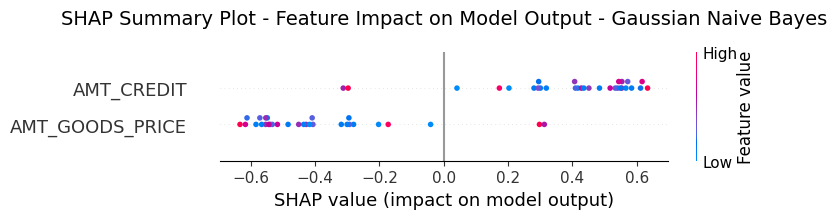

In [27]:
# Robust SHAP summary plots with shape alignment to avoid AssertionError

# 1. Get the raw SHAP values array
shap_array = np.array(shap_values_to_use)

# 2. Normalize dimensionality:
#    Expected final shape: (n_samples, n_features)
if shap_array.ndim == 1:
	shap_array = shap_array.reshape(1, -1)
elif shap_array.ndim == 3:
	# Possible shape (n_samples, n_classes, n_features)
	if shap_array.shape[1] == 2:        # binary classification
		shap_array = shap_array[:, 1, :]
	else:
		# pick class with largest mean |SHAP| across samples
		mean_abs_per_class = np.abs(shap_array).mean(axis=(0, 2))
		cls_idx = int(np.argmax(mean_abs_per_class))
		shap_array = shap_array[:, cls_idx, :]
elif shap_array.ndim != 2:
	raise ValueError(f"Unhandled SHAP array ndim={shap_array.ndim}")

# 3. Get corresponding feature matrix used when computing SHAP
if 'test_sample' in globals():
	data_df = test_sample.copy()
elif 'X_test_sample' in globals():
	data_df = X_test_sample.copy()
else:
	raise NameError("Neither test_sample nor X_test_sample is defined. Run the SHAP computation cell first.")

# 4. Align columns (feature count)
if shap_array.shape[1] != data_df.shape[1]:
	# If feature reduction was applied, selected_features should exist
	if 'selected_features' in globals():
		# Keep only the first shap_array.shape[1] selected features (safety slice)
		expected_feats = selected_features[:shap_array.shape[1]]
		data_df = data_df[expected_feats]
	else:
		# Fallback: truncate or slice raw columns to match
		data_df = data_df.iloc[:, :shap_array.shape[1]]

# 5. Align row count (sample count)
if shap_array.shape[0] != data_df.shape[0]:
	data_df = data_df.iloc[:shap_array.shape[0], :]

# 6. Final assertion
assert shap_array.shape[0] == data_df.shape[0] and shap_array.shape[1] == data_df.shape[1], \
	f"Post-alignment mismatch: shap {shap_array.shape} vs data {data_df.shape}"

# Ensure downstream cells (e.g. waterfall) can reuse a consistent name
X_test_sample = data_df

print(f"SHAP values shape: {shap_array.shape}")
print(f"Data frame shape:  {X_test_sample.shape}")

# 7. Bar summary (mean |SHAP| per feature)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_array, X_test_sample, plot_type="bar", show=False)
plt.title('SHAP Feature Importance (Mean |SHAP value|)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# 8. Detailed beeswarm summary
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_array, X_test_sample, show=False)
plt.title('SHAP Summary Plot - Feature Impact on Model Output - Gaussian Naive Bayes', fontsize=14, pad=20)
plt.tight_layout()
plt.show()


=== SAMPLE 1 (Pos 0) ===
Actual label: 0
Predicted probability (class 1): 0.0239


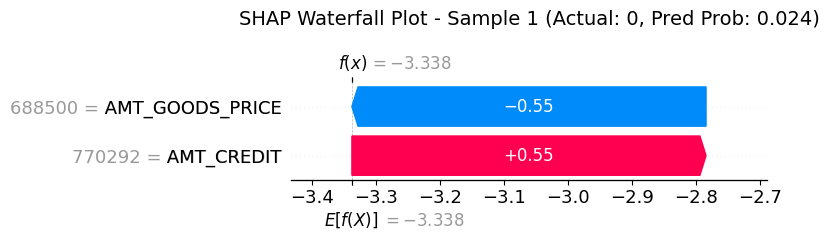


=== SAMPLE 2 (Pos 1) ===
Actual label: 0
Predicted probability (class 1): 0.0318


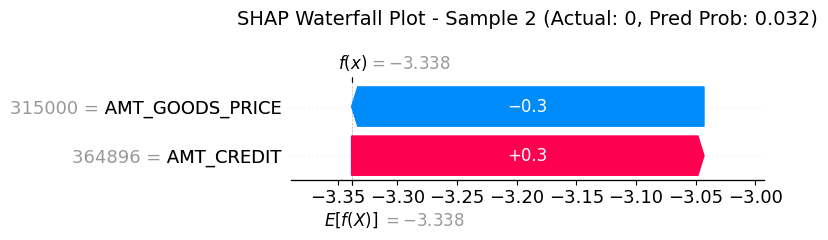


=== SAMPLE 3 (Pos 2) ===
Actual label: 0
Predicted probability (class 1): 0.0072


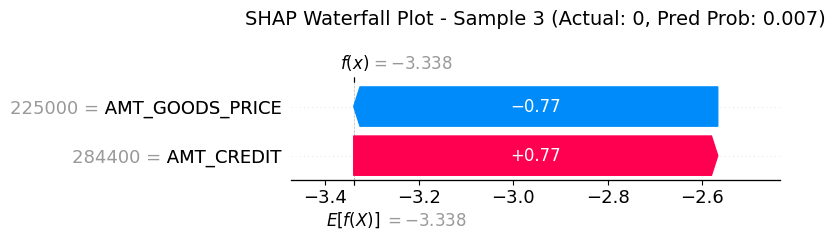

In [28]:
# SHAP Waterfall Plot - Explain individual predictions
# This cell fixes shape issues when passing SHAP values to waterfall_plot.
# It normalizes different possible shapes returned by SHAP (2D or 3D, list, etc.).

# Ensure we have the same sample DataFrame name used in the SHAP computation cell
if 'X_test_sample' not in globals():
    # Cell 24 used 'test_sample'; fall back if alias not created
    if 'test_sample' in globals():
        X_test_sample = test_sample.copy()
    else:
        raise NameError("Neither X_test_sample nor test_sample is defined.")

# Choose which samples (by positional index within X_test_sample) to explain
sample_indices = [0, 1, 2]  # First three samples (adjust as needed)

# Helper to extract a 1D vector of SHAP values for a single sample (positive class for binary)
def get_sample_shap(idx_pos):
    sv = shap_values_to_use
    # List form (multi-class)
    if isinstance(sv, list):
        # Assume binary -> take positive class (index 1) if available
        if len(sv) == 2:
            return sv[1][idx_pos]
        else:
            # Fallback: choose class with largest mean |SHAP|
            magnitudes = [abs(c[idx_pos]).mean() for c in sv]
            cls = int(np.argmax(magnitudes))
            return sv[cls][idx_pos]
    sv = np.array(sv)
    if sv.ndim == 3:
        # (n_samples, n_classes, n_features) -> pick positive class (1) if exists else argmax prob
        if sv.shape[1] == 2:
            return sv[idx_pos, 1, :]
        else:
            # choose class with largest mean |SHAP| across features for this sample
            cls = int(np.argmax(np.abs(sv[idx_pos]).mean(axis=1)))
            return sv[idx_pos, cls, :]
    elif sv.ndim == 2:
        # (n_samples, n_features)
        return sv[idx_pos]
    elif sv.ndim == 1:
        # Single sample already
        return sv
    else:
        raise ValueError(f"Unsupported SHAP values dimensionality: {sv.ndim}")

# Normalize base value (pick positive class if iterable of length 2)
bv = base_value
if isinstance(bv, (list, tuple, np.ndarray)) and len(np.atleast_1d(bv)) == 2:
    bv_effective = np.atleast_1d(bv)[1]
else:
    # scalar or single-element
    try:
        bv_effective = float(np.mean(bv))
    except Exception:
        bv_effective = bv

for i, idx in enumerate(sample_indices):
    if idx >= len(X_test_sample):
        print(f"Skipping index {idx}: out of range for X_test_sample (size={len(X_test_sample)})")
        continue

    # Get actual label (positional)
    actual_label = y_test_sample.iloc[idx] if 'y_test_sample' in globals() and len(y_test_sample) > idx else y_test.iloc[idx]

    # Probability for class 1 using the same positional slice
    predicted_prob = model.predict_proba(X_test.iloc[[idx]])[0, 1] if 'X_test' in globals() and len(X_test) > idx else model.predict_proba(X_test_sample.iloc[[idx]])[0, 1]

    shap_values_vector = get_sample_shap(idx)
    if shap_values_vector.ndim != 1:
        raise ValueError(f"Expected 1D SHAP vector, got shape {shap_values_vector.shape}")

    # Align feature values
    feature_row = X_test_sample.iloc[idx]
    if len(shap_values_vector) != len(feature_row):
        # Attempt alignment if there is a mismatch (e.g., reduced feature set)
        if 'selected_features' in globals():
            feature_row = feature_row[selected_features[:len(shap_values_vector)]]
        if len(shap_values_vector) != len(feature_row):
            raise ValueError(f"SHAP vector length {len(shap_values_vector)} != feature row length {len(feature_row)} after alignment.")

    print(f"\n=== SAMPLE {i+1} (Pos {idx}) ===")
    print(f"Actual label: {actual_label}")
    print(f"Predicted probability (class 1): {predicted_prob:.4f}")

    plt.figure(figsize=(12, 8))
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values_vector,
            base_values=bv_effective,
            data=feature_row.values,
            feature_names=feature_row.index.tolist()
        ),
        show=False
    )
    plt.title(
        f'SHAP Waterfall Plot - Sample {i+1} (Actual: {actual_label}, Pred Prob: {predicted_prob:.3f})',
        fontsize=14, pad=20
    )
    plt.tight_layout()
    plt.show()